# Predicting Renewable Energy Consumption


## 1- Problem Identification:

The widespread use of fossil fuels comes with significant environmental, health, economic, and political consequences.
Here are the key issues associated with fossil fuel use:
- Environment Issues:  such as Greenhouse Gas Emissions and Climate Change, air pollution, acid rain, water pollution, habitat destruction, and resource depletion.
- Health issues such as respiratory problems, Heart Disease and Stroke, Premature Mortality and workers Toxic Exposure.
- Economic Problems essentially increased energy costs, energy insecurity and high Infrastructure Costs as reserves become more difficult to access.
- Geopolitical Tensions and Conflicts particularly in resource-rich regions.
- Energy Transition Challenges and Waste Management Problems.
- Climate Change Feedback Loops such as melting Permafrost in Arctic regions and ocean acidification.

These problems underscore the need for a transition to cleaner, more sustainable energy sources like wind, solar, and hydropower to mitigate climate change, reduce pollution, and ensure long-term energy security.

My dataset provides monthly data on renewable energy consumption in the United States from January 1973 to December 2024, broken down by consumption sector (residential, commercial, transportation, electric power, and industrial) and renewable energy source (hydroelectric, geothermal, solar, wind, wood, waste, fuel ethanol, biomass losses and co-products, renewable diesel fuel, other biofuels, and biodiesel). 
(This data was sourced from the U.S. Energy Information Administration.)

My goal is to analyze trends in renewable energy consumption over time (monthly and yearly) and across various sectors, and to develop a model that predicts future consumption.


## 2- Loading and Cleaning data :

### importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Loading data

In [2]:
# read the data
df = pd.read_csv(r"C:\Users\sanas\OneDrive\Desktop\DSC550 Datasets\RE dataset.csv")

# display the first few rows
df.head()

,Year,Month,Sector,Hydroelectric Power,Geothermal Energy,Solar Energy,Wind Energy,Wood Energy,Waste Energy,"Fuel Ethanol, Excluding Denaturant",Biomass Losses and Co-products,Biomass Energy,Total Renewable Energy,Renewable Diesel Fuel,Other Biofuels,Conventional Hydroelectric Power,Biodiesel
0,1973,1,Commerical,0.00,0.00,0.0,0.0,0.570,0.000,0.0,0.0,0.570,0.570,0.0,0.0,0.000,0.0
1,1973,1,Electric Power,0.00,0.49,0.0,0.0,0.054,0.157,0.0,0.0,0.211,89.223,0.0,0.0,88.522,0.0
2,1973,1,Industrial,1.04,0.00,0.0,0.0,98.933,0.000,0.0,0.0,98.933,99.973,0.0,0.0,0.000,0.0
3,1973,1,Residential,0.00,0.00,0.0,0.0,30.074,0.000,0.0,0.0,0.000,30.074,0.0,0.0,0.000,0.0
4,1973,1,Transportation,0.00,0.00,0.0,0.0,0.000,0.000,0.0,0.0,0.000,0.000,0.0,0.0,0.000,0.0


In [3]:
# display the number of rows and columns in the dataset
df.shape

(3065, 17)

The data contains 3065 rows and 17 columns.

In [4]:
# display the column names
df.columns

Index(['Year', 'Month', 'Sector', 'Hydroelectric Power', 'Geothermal Energy',
       'Solar Energy', 'Wind Energy', 'Wood Energy', 'Waste Energy',
       'Fuel Ethanol, Excluding Denaturant', 'Biomass Losses and Co-products',
       'Biomass Energy', 'Total Renewable Energy', 'Renewable Diesel Fuel',
       'Other Biofuels', 'Conventional Hydroelectric Power', 'Biodiesel'],
      dtype='object')

In [5]:
# display the unique values in the 'Sector' column.
df.Sector.unique()

array(['Commerical', 'Electric Power', 'Industrial', 'Residential',
       'Transportation'], dtype=object)

The data represents the renowable energy in 5 sectors which are : 'Commerical', 'Electric', 'Industrial', 'Residential' and 
       'Transportation'.

### Cleaning the data:

In [6]:
# Check for duplicates in the dataset
duplicates = df.duplicated().sum()
print("The dataset contains {} duplicates.".format(duplicates))

The dataset contains 0 duplicates.


In [7]:
# Check the presence of Null values in the dataset
df.isnull().sum()

Year                                  0
Month                                 0
Sector                                0
Hydroelectric Power                   0
Geothermal Energy                     0
Solar Energy                          0
Wind Energy                           0
Wood Energy                           0
Waste Energy                          0
Fuel Ethanol, Excluding Denaturant    0
Biomass Losses and Co-products        0
Biomass Energy                        0
Total Renewable Energy                0
Renewable Diesel Fuel                 0
Other Biofuels                        0
Conventional Hydroelectric Power      0
Biodiesel                             0
dtype: int64

The dataset has no Null values.

In [8]:
# overview of the data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3065 entries, 0 to 3064
Data columns (total 17 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Year                                3065 non-null   int64  
 1   Month                               3065 non-null   int64  
 2   Sector                              3065 non-null   object 
 3   Hydroelectric Power                 3065 non-null   float64
 4   Geothermal Energy                   3065 non-null   float64
 5   Solar Energy                        3065 non-null   float64
 6   Wind Energy                         3065 non-null   float64
 7   Wood Energy                         3065 non-null   float64
 8   Waste Energy                        3065 non-null   float64
 9   Fuel Ethanol, Excluding Denaturant  3065 non-null   float64
 10  Biomass Losses and Co-products      3065 non-null   float64
 11  Biomass Energy                      3065 no

In [9]:
# drop the column 'Total Renewable Energy' because it represents the sum of the other sources of renewable energy.:
df = df.drop('Total Renewable Energy', axis=1)

# check the column drop
df.head()

,Year,Month,Sector,Hydroelectric Power,Geothermal Energy,Solar Energy,Wind Energy,Wood Energy,Waste Energy,"Fuel Ethanol, Excluding Denaturant",Biomass Losses and Co-products,Biomass Energy,Renewable Diesel Fuel,Other Biofuels,Conventional Hydroelectric Power,Biodiesel
0,1973,1,Commerical,0.00,0.00,0.0,0.0,0.570,0.000,0.0,0.0,0.570,0.0,0.0,0.000,0.0
1,1973,1,Electric Power,0.00,0.49,0.0,0.0,0.054,0.157,0.0,0.0,0.211,0.0,0.0,88.522,0.0
2,1973,1,Industrial,1.04,0.00,0.0,0.0,98.933,0.000,0.0,0.0,98.933,0.0,0.0,0.000,0.0
3,1973,1,Residential,0.00,0.00,0.0,0.0,30.074,0.000,0.0,0.0,0.000,0.0,0.0,0.000,0.0
4,1973,1,Transportation,0.00,0.00,0.0,0.0,0.000,0.000,0.0,0.0,0.000,0.0,0.0,0.000,0.0


## 3- Data Exploration:

#### - Descriptive statistics:

In [10]:
df[['Hydroelectric Power', 'Geothermal Energy',
       'Solar Energy', 'Wind Energy', 'Wood Energy', 'Waste Energy',
       'Fuel Ethanol, Excluding Denaturant', 'Biomass Losses and Co-products',
       'Biomass Energy', 'Renewable Diesel Fuel',
       'Other Biofuels', 'Conventional Hydroelectric Power', 'Biodiesel']].describe()

,Hydroelectric Power,Geothermal Energy,Solar Energy,Wind Energy,Wood Energy,Waste Energy,"Fuel Ethanol, Excluding Denaturant",Biomass Losses and Co-products,Biomass Energy,Renewable Diesel Fuel,Other Biofuels,Conventional Hydroelectric Power,Biodiesel
count,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000
mean,0.169759,1.146369,2.015008,4.282404,36.644408,5.820124,6.976648,4.834706,46.285969,0.428949,0.031752,15.757374,0.953720
std,0.373819,1.550857,5.774511,18.124793,46.900639,8.247359,21.911920,15.601717,64.241520,2.687850,0.258149,32.134059,3.985003
min,-0.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.483000,0.000000,0.000000,0.000000,0.258000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.357000,0.004000,0.000000,12.062000,0.108000,0.007000,0.000000,9.716000,0.000000,0.000000,0.000000,0.000000
75%,0.036000,1.673000,0.774000,0.001000,51.808000,12.764000,1.283000,0.000000,89.359000,0.000000,0.000000,0.000000,0.000000
max,2.047000,5.951000,64.040000,157.409000,183.628000,32.875000,104.420000,75.373000,233.200000,38.344000,4.101000,117.453000,27.871000


- The biomass energy (46.285) and wood energy (36.64) are on average the most important sources of renowable energy consumed.
- 75% of US residents consument monthly 89.36 trillion BTUs of Biomass Energy, 51.80 trillion BTUs of Wood Energy, 12.7 of Waste Energy and 3.763 trillion BTUs of all other sources of energy.


#### - Graphical analysis:

In [11]:
# group data by sector
energy_by_sector =  df.groupby('Sector').sum()
energy_by_sector

,Year,Month,Hydroelectric Power,Geothermal Energy,Solar Energy,Wind Energy,Wood Energy,Waste Energy,"Fuel Ethanol, Excluding Denaturant",Biomass Losses and Co-products,Biomass Energy,Renewable Diesel Fuel,Other Biofuels,Conventional Hydroelectric Power,Biodiesel
Sector,,,,,,,,,,,,,,,
Commerical,1224800,3979,13.409,450.646,446.318,5.802,2868.583,1444.467,279.609,0.000,4592.659,0.000,0.000,0.000,0.000
Electric Power,1224800,3979,0.000,2132.048,2765.146,13114.608,6083.807,8873.151,0.000,0.000,14956.952,0.000,0.000,48296.351,0.000
Industrial,1224800,3979,506.902,132.217,111.765,5.159,74538.427,7521.062,339.035,14818.375,97216.902,0.000,0.000,0.000,0.000
Residential,1224800,3979,0.000,798.711,2852.771,0.000,28824.295,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Transportation,1224800,3979,0.000,0.000,0.000,0.000,0.000,0.000,20764.782,0.000,25099.983,1314.728,97.321,0.000,2923.152


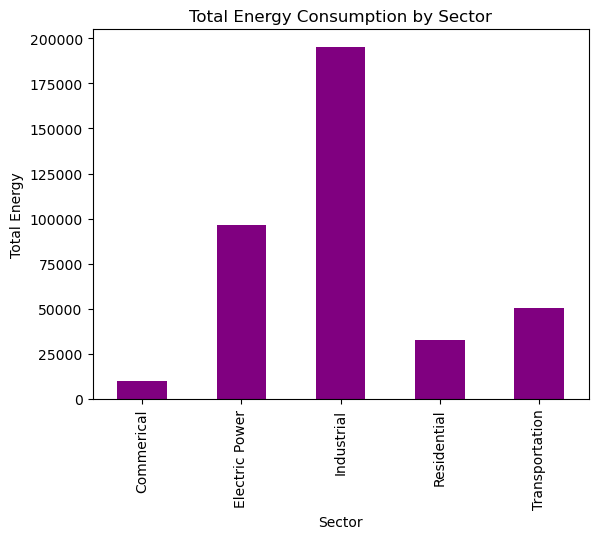

In [12]:
# Total consumption of energy by sector:
totalEnergy_by_sector = energy_by_sector[['Hydroelectric Power', 'Geothermal Energy', 'Solar Energy', 'Wind Energy', 'Wood Energy', 'Waste Energy', 'Fuel Ethanol, Excluding Denaturant', 'Biomass Losses and Co-products',
       'Biomass Energy', 'Renewable Diesel Fuel', 'Other Biofuels', 'Conventional Hydroelectric Power', 'Biodiesel']].sum(axis=1)
totalEnergy_by_sector.plot(kind='bar', color = 'purple')
plt.title('Total Energy Consumption by Sector')
plt.xlabel('Sector')
plt.ylabel('Total Energy')
plt.show()

The bar plot illustrates that the industrial sector consumes the highest amount of energy compared to the other sectors. Following this, the electric power sector ranks second in energy consumption, followed by the transportation, residential and finally the commercial sectors.

In [13]:
# Energy type by sector

In [14]:
# create a dataframe containing only the energy type
enery_type_df = df[['Hydroelectric Power', 'Geothermal Energy',
       'Solar Energy', 'Wind Energy', 'Wood Energy', 'Waste Energy',
       'Fuel Ethanol, Excluding Denaturant', 'Biomass Losses and Co-products',
       'Biomass Energy', 'Renewable Diesel Fuel',
       'Other Biofuels', 'Conventional Hydroelectric Power', 'Biodiesel']]


In [15]:
# group the energy type data by sector
energyType_by_sector = df.groupby('Sector')[enery_type_df.columns].sum()
energyType_by_sector

,Hydroelectric Power,Geothermal Energy,Solar Energy,Wind Energy,Wood Energy,Waste Energy,"Fuel Ethanol, Excluding Denaturant",Biomass Losses and Co-products,Biomass Energy,Renewable Diesel Fuel,Other Biofuels,Conventional Hydroelectric Power,Biodiesel
Sector,,,,,,,,,,,,,
Commerical,13.409,450.646,446.318,5.802,2868.583,1444.467,279.609,0.000,4592.659,0.000,0.000,0.000,0.000
Electric Power,0.000,2132.048,2765.146,13114.608,6083.807,8873.151,0.000,0.000,14956.952,0.000,0.000,48296.351,0.000
Industrial,506.902,132.217,111.765,5.159,74538.427,7521.062,339.035,14818.375,97216.902,0.000,0.000,0.000,0.000
Residential,0.000,798.711,2852.771,0.000,28824.295,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Transportation,0.000,0.000,0.000,0.000,0.000,0.000,20764.782,0.000,25099.983,1314.728,97.321,0.000,2923.152


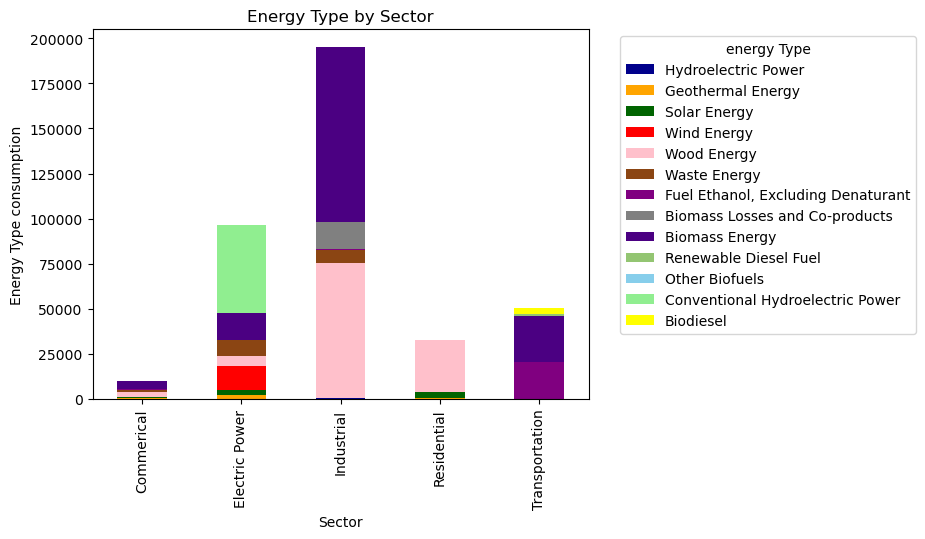

In [16]:
# plot the energy type data by sector
colors = ['#00008B', '#FFA500', '#006400', '#FF0000', '#FFC0CB', '#8B4513', '#800080', '#808080','#4B0082', '#93C572', '#87CEEB', '#90EE90', '#FFFF00']
energyType_by_sector.plot(kind='bar', stacked=True, color = colors)
plt.title('Energy Type by Sector')
plt.xlabel("Sector")
plt.ylabel("Energy Type consumption")
plt.legend(title= 'energy Type', bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()


The graph illustrates the consumption of different energy types across various sectors:
- In industrial sector, biomass and wood energy are consumed in significant quantities, while waste energy and biomass losses and co-products are used in smaller amounts.
- In residential sector, wood energy is the primary source of energy, with a small contribution from solar energy.
- The electric power sector relies predominantly on conventional hydroelectric power, with additional contributions from biomass, waste, wood, and wind energy, and minimal use of solar and geothermal energy.
- In transportation sector, Fuel ethanol (excluding denaturant) and biomass energy are the primary sources, with minor usage of biodiesel and conventional hydroelectric power.
- Finally, the commercial sector shows a modest consumption of biomass and wood energy.

In [17]:
# Total consumption by energy type


In [18]:
# Total consumption of each energy type
energy_type_sum = enery_type_df.sum()
energy_type_sum

Hydroelectric Power                      520.311
Geothermal Energy                       3513.622
Solar Energy                            6176.000
Wind Energy                            13125.569
Wood Energy                           112315.112
Waste Energy                           17838.680
Fuel Ethanol, Excluding Denaturant     21383.426
Biomass Losses and Co-products         14818.375
Biomass Energy                        141866.496
Renewable Diesel Fuel                   1314.728
Other Biofuels                            97.321
Conventional Hydroelectric Power       48296.351
Biodiesel                               2923.152
dtype: float64

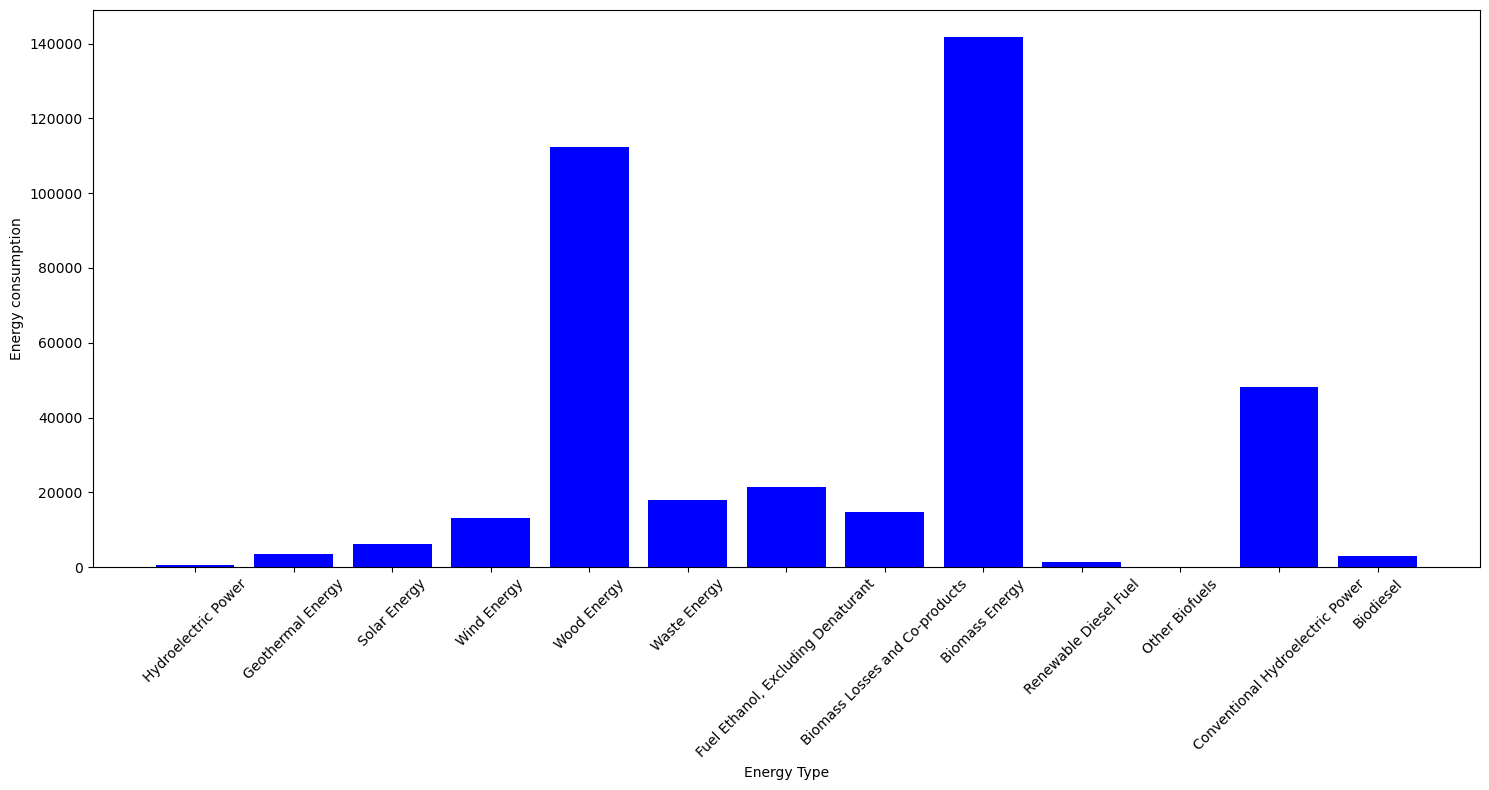

In [19]:
# plot the Total consumption of each energy type
plt.figure(figsize=(15,8))
plt.bar(energy_type_sum.index, energy_type_sum.values, color='blue')
plt.xlabel('Energy Type')
plt.ylabel('Energy consumption')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()


- The bar plot illustrates that the predominant sources of energy in the U.S. from 1973 to 2024 are biomass energy (exceeding 140,000 trillion BTUs), wood energy (over 110,000 trillion BTUs), and conventional hydroelectric power (more than 40,000 trillion BTUs). On the other hand, the least utilized sources include renewable diesel fuel, biodiesel, hydroelectric power, geothermal energy, and solar energy, each contributing less than 1,000 trillion BTUs.

- This graph provides an overall view of energy consumption from 1973 to 2024. It’s important to note that renewable energy played a smaller role in the past compared to more recent years. Therefore, to gain deeper insights, we can explore the variations in energy consumption over time.

In [20]:
# Total Yearly Renewable Energy Consumption

In [21]:
# group data by year
Energy_by_year = df.groupby('Year').sum()

# group the total energy by year
totalEnergy_by_year = Energy_by_year[enery_type_df.columns].sum(axis=1)


C:\Users\sanas\AppData\Local\Temp\ipykernel_31312\622269175.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Energy_by_year = df.groupby('Year').sum()


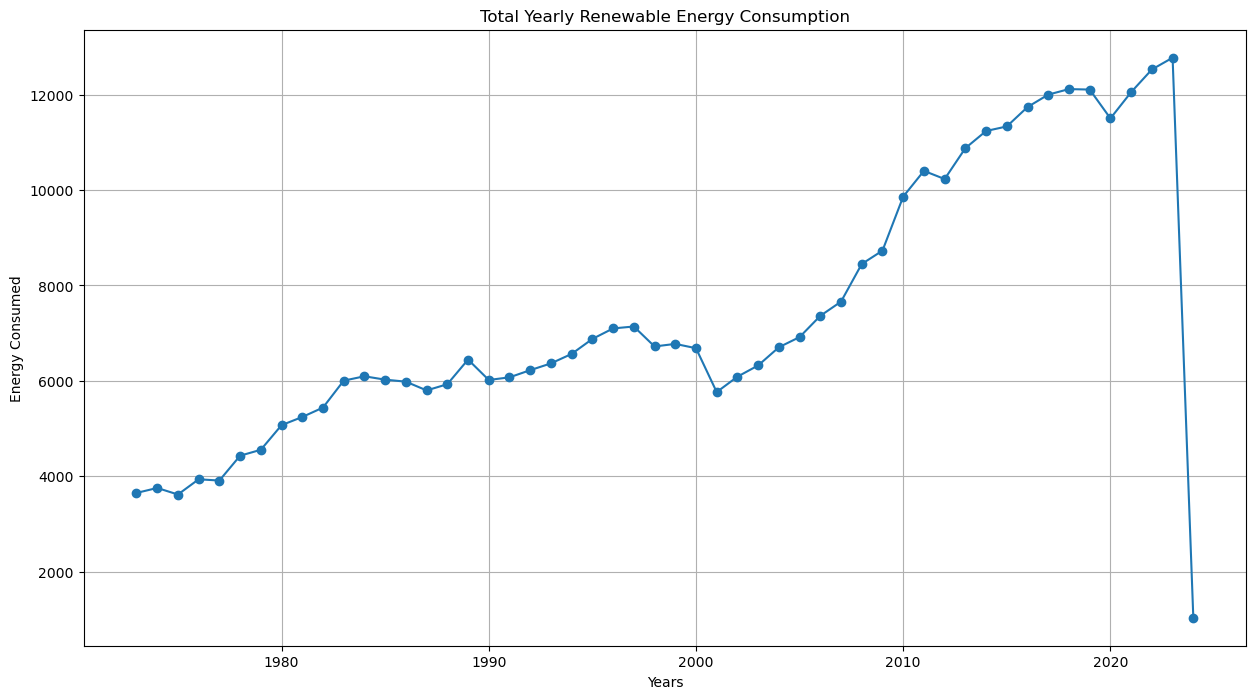

In [22]:
# plot the total energy consumed by year
plt.figure(figsize=(15,8))
totalEnergy_by_year.plot(kind='line', marker = 'o')
plt.title('Total Yearly Renewable Energy Consumption')
plt.xlabel('Years')
plt.ylabel('Energy Consumed')
plt.grid(True)
plt.show()

The use of renewable energy was moderate in 1973, at less than 4000 trillion BTUs. It continued to increase, reaching 6000 trillion BTUs in 1990, 10000 trillion BTUs in 2010, and peaking at 14000 trillion BTUs in 2024.

In [23]:
# group the energy type data by Year
energyType_by_year = df.groupby('Year')[enery_type_df.columns].sum()

<Figure size 2000x1000 with 0 Axes>

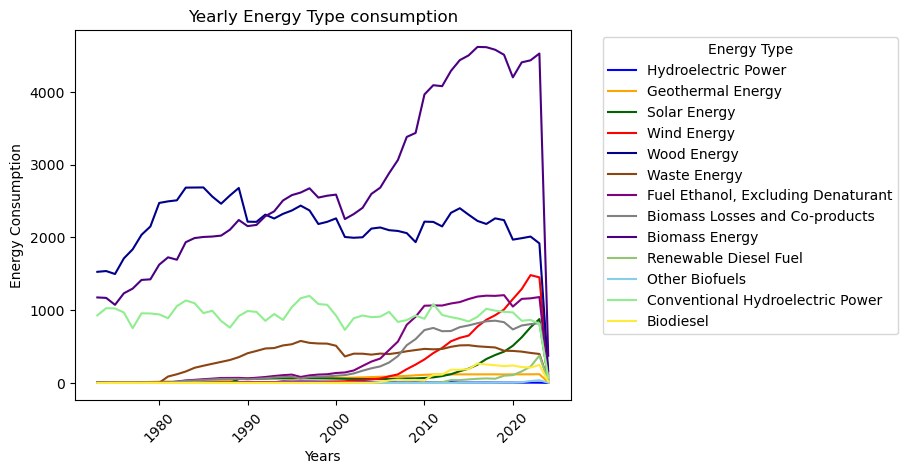

In [24]:
# plot the yearly consumption of each energy type
colors = ['#0000FF', '#FFA500', '#006400', '#FF0000', '#00008B', '#8B4513', '#800080', '#808080','#4B0082', '#93C572', '#87CEEB', '#90EE90', '#FFEB3B']
plt.figure(figsize=(20,10))
energyType_by_year.plot(kind='line', color=colors)
plt.title('Yearly Energy Type consumption')
plt.xlabel('Years')
plt.ylabel('Energy Consumption')
plt.xticks(rotation=45)
plt.legend(title='Energy Type',bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

The line plot highlights the variation of each energy type consunption from 1973 to 2024.
We noticed that:
- The Biomass energy consumption was modest in the early years (less than 2,000 trillion BTUs in 1980) but steadily increased year after year, peaking between 2010 and 2024 at over 40,000 trillion BTUs.
- The consumption of biodiesel, fuel ethanol (excluding denaturant), renewable diesel fuel, wind energy, solar energy, and biomass losses and co-products was minimal before 2,000, but has since seen continuous growth.
- Waste energy has been consumed moderately and consistently since the 1980s.
- Conventional hydroelectric power has remained stable in its consumption since the early years, averaging around 1,000 trillion BTUs.
- Wood energy consumption was significant as early as the year 1973, reaching its peak between 1980 and 1990. Although it slightly declined afterward, it remains a major energy source.

In [25]:
# Monthly Total Energy Consumption:

C:\Users\sanas\AppData\Local\Temp\ipykernel_31312\2863139109.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Energy_by_month = df.groupby('Month').sum()


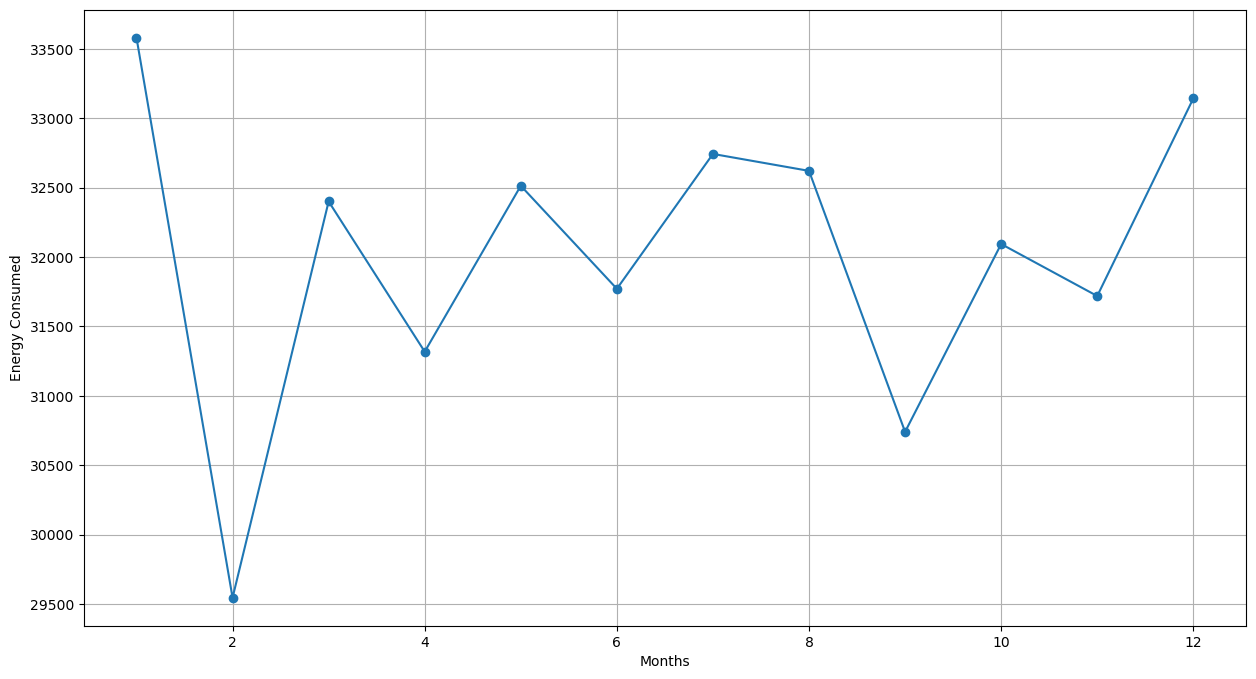

In [26]:
Energy_by_month = df.groupby('Month').sum()
totalEnergy_by_month = Energy_by_month[enery_type_df.columns].sum(axis=1)

plt.figure(figsize=(15,8))
totalEnergy_by_month.plot(kind='line', marker='o')
plt.xlabel('Months')
plt.ylabel('Energy Consumed')
plt.grid(True)
plt.show()

The graph shows that energy consumption peaks in January and December, while the lowest consumption occurs in February. Energy usage across other months follows a consistent, cyclic pattern. This suggests that energy consumption is significantly higher in winter compared to summer and spring. 

## 4- Conclusion:

The most significant energy-consuming sectors are industrial, electric power, and transportation. The predominant sources of energy are biomass energy, wood energy, and conventional hydroelectric power, which have been consistently consumed over the years. However, biomass energy has seen a particularly significant increase compared to the other two sources.
Other renewable energy sources, such as biodiesel, fuel ethanol (excluding denaturant), renewable diesel fuel, wind energy, solar energy, and biomass losses and co-products, were moderately consumed in the past but have experienced substantial growth since 2000. This shift is promising for economic, environmental, and health-related reasons.

Our analysis highlights key insights into renewable energy trends in the US. The next step is to develop a model that captures these consumption patterns and predicts future energy usage.

# Project Milestone 2:

## Importing libraries:

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1- Drop any features that are not useful for model building:

In [28]:
df.head()

,Year,Month,Sector,Hydroelectric Power,Geothermal Energy,Solar Energy,Wind Energy,Wood Energy,Waste Energy,"Fuel Ethanol, Excluding Denaturant",Biomass Losses and Co-products,Biomass Energy,Renewable Diesel Fuel,Other Biofuels,Conventional Hydroelectric Power,Biodiesel
0,1973,1,Commerical,0.00,0.00,0.0,0.0,0.570,0.000,0.0,0.0,0.570,0.0,0.0,0.000,0.0
1,1973,1,Electric Power,0.00,0.49,0.0,0.0,0.054,0.157,0.0,0.0,0.211,0.0,0.0,88.522,0.0
2,1973,1,Industrial,1.04,0.00,0.0,0.0,98.933,0.000,0.0,0.0,98.933,0.0,0.0,0.000,0.0
3,1973,1,Residential,0.00,0.00,0.0,0.0,30.074,0.000,0.0,0.0,0.000,0.0,0.0,0.000,0.0
4,1973,1,Transportation,0.00,0.00,0.0,0.0,0.000,0.000,0.0,0.0,0.000,0.0,0.0,0.000,0.0


I noticed that the columns 'Solar energy', 'Wind energy', 'Fuel Ethanol, Excluding Denaturant', 'Biomass Losses and Co-products', 'Renewable Diesel Fuel', 'Other Biofuels', 'Biodiesel', include many zero values. Let's try to count the zero values in these columns.

In [29]:
# print the count of zero values in the columns 'Solar energy', 'Wind energy', 'Fuel Ethanol, Excluding Denaturant', 'Biomass Losses and Co-products', 'Renewable Diesel Fuel', 'Other Biofuels', 'Biodiesel'  
print('Solar energy:', df[df['Solar Energy']==0]['Solar Energy'].count())
print('Wind Energy:', df[df['Wind Energy']==0]['Wind Energy'].count())
print('Fuel Ethanol, Excluding Denaturant:', df[df['Fuel Ethanol, Excluding Denaturant']==0]['Fuel Ethanol, Excluding Denaturant'].count())
print('Biomass Losses and Co-products:', df[df['Biomass Losses and Co-products']==0]['Biomass Losses and Co-products'].count())
print('Renewable Diesel Fuel:', df[df['Renewable Diesel Fuel']==0]['Renewable Diesel Fuel'].count())
print('Other Biofuels:', df[df['Other Biofuels']==0]['Other Biofuels'].count())
print('Renewable Diesel Fuel:', df[df['Renewable Diesel Fuel']==0]['Renewable Diesel Fuel'].count())
print('Biodiesel:', df[df['Biodiesel']==0]['Biodiesel'].count())

Solar energy: 1330
Wind Energy: 2274
Fuel Ethanol, Excluding Denaturant: 1514
Biomass Losses and Co-products: 2548
Renewable Diesel Fuel: 2908
Other Biofuels: 2944
Renewable Diesel Fuel: 2908
Biodiesel: 2788


The columns 'Biomass Losses and Co-products', 'Renewable Diesel Fuel', 'Other Biofuels', 'Renewable Diesel Fuel' and 'Biodiesel' have more than 80% of their values equal to zero, so, they might not contribute to predictive power. So, I prefer to drop these columns.

In [30]:
# drop the columns 'Biomass Losses and Co-products', 'Renewable Diesel Fuel', 'Other Biofuels', 'Renewable Diesel Fuel' and 'Biodiesel'
df = df.drop(['Biomass Losses and Co-products', 'Renewable Diesel Fuel', 'Other Biofuels', 'Renewable Diesel Fuel','Biodiesel'], axis=1)

# check if the columns were dropped
df.head()

,Year,Month,Sector,Hydroelectric Power,Geothermal Energy,Solar Energy,Wind Energy,Wood Energy,Waste Energy,"Fuel Ethanol, Excluding Denaturant",Biomass Energy,Conventional Hydroelectric Power
0,1973,1,Commerical,0.00,0.00,0.0,0.0,0.570,0.000,0.0,0.570,0.000
1,1973,1,Electric Power,0.00,0.49,0.0,0.0,0.054,0.157,0.0,0.211,88.522
2,1973,1,Industrial,1.04,0.00,0.0,0.0,98.933,0.000,0.0,98.933,0.000
3,1973,1,Residential,0.00,0.00,0.0,0.0,30.074,0.000,0.0,0.000,0.000
4,1973,1,Transportation,0.00,0.00,0.0,0.0,0.000,0.000,0.0,0.000,0.000


## 2-Dealing with missing data:

- According to the dataset details, every entry that has a value of 0 means that the datapoint was either "Not Available," "No Data Reported," or "Not Meaningful".

- I prefer there to replace the zeros in these columns with the mean value, because removing the rows with zeros will almost lead to deleting almost more than 50% of the data.

In [31]:
# define the columns that we will replace its zeros to mean value
columns_to_transform = ['Hydroelectric Power', 'Geothermal Energy', 'Solar Energy', 'Wind Energy', 'Wood Energy', 'Waste Energy', 'Fuel Ethanol, Excluding Denaturant', 'Biomass Energy', 'Conventional Hydroelectric Power']

# replace the zero value with the mean value in each column
for c in columns_to_transform:
    df[c] = df[c].replace(0, df[c].mean())

# check the update in these columns
df.head()

,Year,Month,Sector,Hydroelectric Power,Geothermal Energy,Solar Energy,Wind Energy,Wood Energy,Waste Energy,"Fuel Ethanol, Excluding Denaturant",Biomass Energy,Conventional Hydroelectric Power
0,1973,1,Commerical,0.169759,1.146369,2.015008,4.282404,0.570000,5.820124,6.976648,0.570000,15.757374
1,1973,1,Electric Power,0.169759,0.490000,2.015008,4.282404,0.054000,0.157000,6.976648,0.211000,88.522000
2,1973,1,Industrial,1.040000,1.146369,2.015008,4.282404,98.933000,5.820124,6.976648,98.933000,15.757374
3,1973,1,Residential,0.169759,1.146369,2.015008,4.282404,30.074000,5.820124,6.976648,46.285969,15.757374
4,1973,1,Transportation,0.169759,1.146369,2.015008,4.282404,36.644408,5.820124,6.976648,46.285969,15.757374


## 3-Perform any data extraction/selection steps:

In the 'Month' Column, we can extract relevant time-related information like seasons. So, we are going to create a feature indicating if it is Summer, Winter, Spring or Fall.

In [32]:
# function to get the season according to the month number 
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'

In [33]:
# create the new feature 'Season'
df['Season'] = df['Month'].apply(get_season)

# check the feature extraction
df.head()

,Year,Month,Sector,Hydroelectric Power,Geothermal Energy,Solar Energy,Wind Energy,Wood Energy,Waste Energy,"Fuel Ethanol, Excluding Denaturant",Biomass Energy,Conventional Hydroelectric Power,Season
0,1973,1,Commerical,0.169759,1.146369,2.015008,4.282404,0.570000,5.820124,6.976648,0.570000,15.757374,Winter
1,1973,1,Electric Power,0.169759,0.490000,2.015008,4.282404,0.054000,0.157000,6.976648,0.211000,88.522000,Winter
2,1973,1,Industrial,1.040000,1.146369,2.015008,4.282404,98.933000,5.820124,6.976648,98.933000,15.757374,Winter
3,1973,1,Residential,0.169759,1.146369,2.015008,4.282404,30.074000,5.820124,6.976648,46.285969,15.757374,Winter
4,1973,1,Transportation,0.169759,1.146369,2.015008,4.282404,36.644408,5.820124,6.976648,46.285969,15.757374,Winter


## 4-Engineer new useful features:

I am going to create a new feature which is the proportion of each type of energy consumed from the total energy consumed.

In [34]:
# calculate the sum of energy consumed
df['Total Energy Consumed'] = df[columns_to_transform].sum(axis=1)

# create the new feature 
for col in columns_to_transform:
    proportion_col = col + '_proportion'
    df[proportion_col] = df[col]/df['Total Energy Consumed']

# check the new feature creation
df.head()

,Year,Month,Sector,Hydroelectric Power,Geothermal Energy,Solar Energy,Wind Energy,Wood Energy,Waste Energy,"Fuel Ethanol, Excluding Denaturant",...,Total Energy Consumed,Hydroelectric Power_proportion,Geothermal Energy_proportion,Solar Energy_proportion,Wind Energy_proportion,Wood Energy_proportion,Waste Energy_proportion,"Fuel Ethanol, Excluding Denaturant_proportion",Biomass Energy_proportion,Conventional Hydroelectric Power_proportion
0,1973,1,Commerical,0.169759,1.146369,2.015008,4.282404,0.570000,5.820124,6.976648,...,37.307686,0.004550,0.030727,0.054011,0.114786,0.015278,0.156003,0.187003,0.015278,0.422363
1,1973,1,Electric Power,0.169759,0.490000,2.015008,4.282404,0.054000,0.157000,6.976648,...,102.877819,0.001650,0.004763,0.019586,0.041626,0.000525,0.001526,0.067815,0.002051,0.860458
2,1973,1,Industrial,1.040000,1.146369,2.015008,4.282404,98.933000,5.820124,6.976648,...,234.903928,0.004427,0.004880,0.008578,0.018230,0.421164,0.024777,0.029700,0.421164,0.067080
3,1973,1,Residential,0.169759,1.146369,2.015008,4.282404,30.074000,5.820124,6.976648,...,112.527656,0.001509,0.010187,0.017907,0.038056,0.267259,0.051722,0.061999,0.411330,0.140031
4,1973,1,Transportation,0.169759,1.146369,2.015008,4.282404,36.644408,5.820124,6.976648,...,119.098064,0.001425,0.009625,0.016919,0.035957,0.307683,0.048868,0.058579,0.388637,0.132306


## 5-Transform features if necessary:

In [35]:
# create distributions of all numeric columns:

In [36]:
# define the numeric data
numeric_data = df.drop(columns=['Year', 'Month', 'Sector', 'Season'], axis=1)

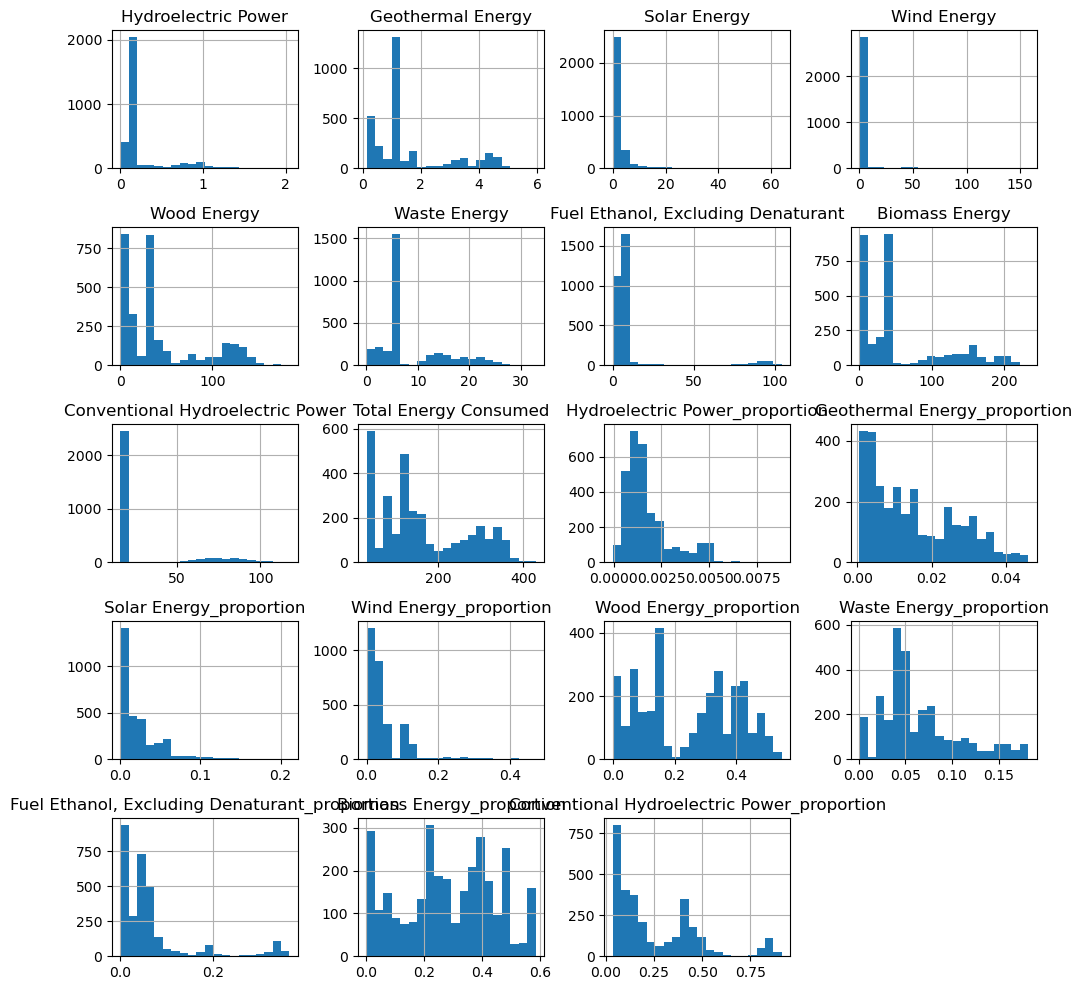

In [37]:
# plot the distribution of values in these columns
numeric_data.hist(bins=20, figsize=(10,10))
plt.tight_layout()
plt.show()

- All the numeric columns  have skewed distributions, so, I am going to apply the log1p transformation to these columns to reduce skewness and improve modeling. 

In [38]:
# apply the log1p transformation

In [39]:
# apply the log1p to these columns
for col in numeric_data.columns:
    df[col]= np.log(df[col]+1)

In [40]:
# display the descriptive statistics (such as mean, median, max, min, etc...) after log1p transformation
df[numeric_data.columns].describe()

,Hydroelectric Power,Geothermal Energy,Solar Energy,Wind Energy,Wood Energy,Waste Energy,"Fuel Ethanol, Excluding Denaturant",Biomass Energy,Conventional Hydroelectric Power,Total Energy Consumed,Hydroelectric Power_proportion,Geothermal Energy_proportion,Solar Energy_proportion,Wind Energy_proportion,Wood Energy_proportion,Waste Energy_proportion,"Fuel Ethanol, Excluding Denaturant_proportion",Biomass Energy_proportion,Conventional Hydroelectric Power_proportion
count,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000
mean,0.224545,0.846986,0.976211,1.567107,3.159828,2.044196,1.665925,3.333485,3.127858,4.847734,0.001747,0.014594,0.022384,0.048891,0.210656,0.061749,0.059129,0.240624,0.212014
std,0.206238,0.440794,0.769324,0.865209,1.340133,0.710513,1.142916,1.426384,0.623146,0.730824,0.001245,0.011476,0.027446,0.059158,0.126258,0.038723,0.073627,0.129006,0.161398
min,-0.002002,0.129272,0.001000,0.001000,0.001998,0.045929,0.003992,0.112435,2.818838,3.509186,-0.000052,0.000433,0.000002,0.000003,0.000019,0.000485,0.000022,0.001130,0.036068
25%,0.156798,0.574927,0.189794,1.664381,2.077064,1.919878,0.759403,2.324347,2.818838,4.366170,0.000954,0.004456,0.001313,0.013838,0.092492,0.038027,0.004276,0.157129,0.067474
50%,0.156798,0.763778,1.103603,1.664381,3.628184,1.919878,2.076518,3.846439,2.818838,4.879222,0.001350,0.011480,0.013142,0.032272,0.240968,0.047914,0.044841,0.250426,0.129744
75%,0.156798,0.983201,1.103603,1.664381,3.966663,2.622056,2.076518,4.503791,2.818838,5.532695,0.002149,0.024095,0.030324,0.054083,0.328779,0.078384,0.059152,0.339521,0.343551
max,1.114158,1.938886,4.175002,5.065180,5.218343,3.522677,4.657952,5.456175,4.774516,6.063892,0.008788,0.044995,0.191462,0.386797,0.436974,0.166743,0.310316,0.460732,0.648661


In [41]:
# display a few rows of tha dataset after log1p transformation
df.head()

,Year,Month,Sector,Hydroelectric Power,Geothermal Energy,Solar Energy,Wind Energy,Wood Energy,Waste Energy,"Fuel Ethanol, Excluding Denaturant",...,Total Energy Consumed,Hydroelectric Power_proportion,Geothermal Energy_proportion,Solar Energy_proportion,Wind Energy_proportion,Wood Energy_proportion,Waste Energy_proportion,"Fuel Ethanol, Excluding Denaturant_proportion",Biomass Energy_proportion,Conventional Hydroelectric Power_proportion
0,1973,1,Commerical,0.156798,0.763778,1.103603,1.664381,0.451076,1.919878,2.076518,...,3.645651,0.004540,0.030265,0.052602,0.108663,0.015163,0.144969,0.171432,0.015163,0.352319
1,1973,1,Electric Power,0.156798,0.398776,1.103603,1.664381,0.052592,0.145830,2.076518,...,4.643215,0.001649,0.004752,0.019397,0.040783,0.000525,0.001525,0.065614,0.002049,0.620822
2,1973,1,Industrial,0.712950,0.763778,1.103603,1.664381,4.604500,1.919878,2.076518,...,5.463425,0.004418,0.004868,0.008541,0.018066,0.351476,0.024475,0.029268,0.351476,0.064926
3,1973,1,Residential,0.156798,0.763778,1.103603,1.664381,3.436371,1.919878,2.076518,...,4.732046,0.001507,0.010136,0.017748,0.037350,0.236856,0.050429,0.060153,0.344532,0.131056
4,1973,1,Transportation,0.156798,0.763778,1.103603,1.664381,3.628184,1.919878,2.076518,...,4.788309,0.001424,0.009579,0.016777,0.035326,0.268257,0.047712,0.056927,0.328323,0.124256


## 6-Create dummy variables if necessary:

- Converting the categorical variables 'Sector' and 'Season' into dummy variables is crucial for modeling as models require numeric input.

In [42]:
# convert the columns 'Sector' and 'Season' to dummy variables
df = pd.get_dummies(df, columns=['Sector', 'Season'], drop_first=True)

# check the conversion to dummy variables
df.head()

,Year,Month,Hydroelectric Power,Geothermal Energy,Solar Energy,Wind Energy,Wood Energy,Waste Energy,"Fuel Ethanol, Excluding Denaturant",Biomass Energy,...,"Fuel Ethanol, Excluding Denaturant_proportion",Biomass Energy_proportion,Conventional Hydroelectric Power_proportion,Sector_Electric Power,Sector_Industrial,Sector_Residential,Sector_Transportation,Season_Spring,Season_Summer,Season_Winter
0,1973,1,0.156798,0.763778,1.103603,1.664381,0.451076,1.919878,2.076518,0.451076,...,0.171432,0.015163,0.352319,0,0,0,0,0,0,1
1,1973,1,0.156798,0.398776,1.103603,1.664381,0.052592,0.145830,2.076518,0.191446,...,0.065614,0.002049,0.620822,1,0,0,0,0,0,1
2,1973,1,0.712950,0.763778,1.103603,1.664381,4.604500,1.919878,2.076518,4.604500,...,0.029268,0.351476,0.064926,0,1,0,0,0,0,1
3,1973,1,0.156798,0.763778,1.103603,1.664381,3.436371,1.919878,2.076518,3.856214,...,0.060153,0.344532,0.131056,0,0,1,0,0,0,1
4,1973,1,0.156798,0.763778,1.103603,1.664381,3.628184,1.919878,2.076518,3.856214,...,0.056927,0.328323,0.124256,0,0,0,1,0,0,1


In [43]:
# transform the binary values in dummy columns to 0 and 1:
df = df.astype(float)

# check the data type transformation
df.head()


,Year,Month,Hydroelectric Power,Geothermal Energy,Solar Energy,Wind Energy,Wood Energy,Waste Energy,"Fuel Ethanol, Excluding Denaturant",Biomass Energy,...,"Fuel Ethanol, Excluding Denaturant_proportion",Biomass Energy_proportion,Conventional Hydroelectric Power_proportion,Sector_Electric Power,Sector_Industrial,Sector_Residential,Sector_Transportation,Season_Spring,Season_Summer,Season_Winter
0,1973.0,1.0,0.156798,0.763778,1.103603,1.664381,0.451076,1.919878,2.076518,0.451076,...,0.171432,0.015163,0.352319,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1973.0,1.0,0.156798,0.398776,1.103603,1.664381,0.052592,0.145830,2.076518,0.191446,...,0.065614,0.002049,0.620822,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1973.0,1.0,0.712950,0.763778,1.103603,1.664381,4.604500,1.919878,2.076518,4.604500,...,0.029268,0.351476,0.064926,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,1973.0,1.0,0.156798,0.763778,1.103603,1.664381,3.436371,1.919878,2.076518,3.856214,...,0.060153,0.344532,0.131056,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1973.0,1.0,0.156798,0.763778,1.103603,1.664381,3.628184,1.919878,2.076518,3.856214,...,0.056927,0.328323,0.124256,0.0,0.0,0.0,1.0,0.0,0.0,1.0


- Creating cyclical features for the column 'Month':

In [44]:
# Create cyclical features for Month
df['Month_sin'] = np.sin(2 * np.pi * df['Month'] / 12)
df['Month_cos'] = np.cos(2 * np.pi * df['Month'] / 12)


Month_sin and Month_cos represent the cyclic information about the months.

Now, the 'Month' column must be dropped to avoid redundant information and prevent multicollinearity.

In [45]:

# drop the column 'Month'
df = df.drop('Month', axis=1)


This is How our dataset looks like after the data preparation steps I performed.

In [46]:
pd.set_option('display.max_columns', None)
df.head()

,Year,Hydroelectric Power,Geothermal Energy,Solar Energy,Wind Energy,Wood Energy,Waste Energy,"Fuel Ethanol, Excluding Denaturant",Biomass Energy,Conventional Hydroelectric Power,Total Energy Consumed,Hydroelectric Power_proportion,Geothermal Energy_proportion,Solar Energy_proportion,Wind Energy_proportion,Wood Energy_proportion,Waste Energy_proportion,"Fuel Ethanol, Excluding Denaturant_proportion",Biomass Energy_proportion,Conventional Hydroelectric Power_proportion,Sector_Electric Power,Sector_Industrial,Sector_Residential,Sector_Transportation,Season_Spring,Season_Summer,Season_Winter,Month_sin,Month_cos
0,1973.0,0.156798,0.763778,1.103603,1.664381,0.451076,1.919878,2.076518,0.451076,2.818838,3.645651,0.004540,0.030265,0.052602,0.108663,0.015163,0.144969,0.171432,0.015163,0.352319,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.5,0.866025
1,1973.0,0.156798,0.398776,1.103603,1.664381,0.052592,0.145830,2.076518,0.191446,4.494484,4.643215,0.001649,0.004752,0.019397,0.040783,0.000525,0.001525,0.065614,0.002049,0.620822,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.5,0.866025
2,1973.0,0.712950,0.763778,1.103603,1.664381,4.604500,1.919878,2.076518,4.604500,2.818838,5.463425,0.004418,0.004868,0.008541,0.018066,0.351476,0.024475,0.029268,0.351476,0.064926,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.5,0.866025
3,1973.0,0.156798,0.763778,1.103603,1.664381,3.436371,1.919878,2.076518,3.856214,2.818838,4.732046,0.001507,0.010136,0.017748,0.037350,0.236856,0.050429,0.060153,0.344532,0.131056,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.5,0.866025
4,1973.0,0.156798,0.763778,1.103603,1.664381,3.628184,1.919878,2.076518,3.856214,2.818838,4.788309,0.001424,0.009579,0.016777,0.035326,0.268257,0.047712,0.056927,0.328323,0.124256,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.5,0.866025


## Conclusion:

In the process of data preparation, I tried to follow these steps:
- Dropping the not useful features ('Solar energy', 'Wind energy', 'Fuel Ethanol, Excluding Denaturant', 'Biomass Losses and Co-products', 'Renewable Diesel Fuel', 'Other Biofuels', 'Biodiesel') because they include many zero values, so do not have a predictive power in this dataset.
- Replacing the missing data (zeros values) with the mean value of each column.
- Extracting relevant time-related information 'seasons' from the 'Month' column.
- Creating a new feature which is the proportion of each type of energy consumed from the total energy consumed.
- Applying the log1p transformation to the numeric columns to reduce skewness and improve modeling.
- Converting the categorical variables 'Sector' and 'Season' into dummy variables and creating cyclical features for the column Month and dropping the original column ('Month')

Now, our dataset is ready to the model building.

# Project Milestone 3:

## Importing libraries:

In [47]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [48]:
# Convert 'Year' to datetime
df['Year'] = pd.to_datetime(df['Year'], format='%Y')   
 # Set 'Year' as the index
df.set_index('Year', inplace=True) 


## Split the data into training and testing data:

In [49]:
# Use 'Total Energy Consumed' as the target for ARIMA/SARIMA
target = df['Total Energy Consumed']


In [50]:
# train test split data
train_size = int(len(target)*0.8)  # 80% for training
train, test = target[:train_size], target[train_size:] # # target[:train_size] is the training set (80% of the target) and target[train_size:] is the testing set (20% of the target) 

##  Fitting Models:

### - ARIMA Model:

In [51]:
# Using auto_arima to find the best (p, d, q) values
auto_model = auto_arima(target, start_p=0, start_q=0,
                        max_p=5, max_q=5, max_d=2,  # Adjust ranges 
                        seasonal=True,  # True because data is seasonal
                        trace=True,      # Shows progress
                        error_action='ignore',  # Ignore errors for better exploration
                        suppress_warnings=True, 
                        stepwise=True)   # Faster computation with stepwise search

# The optimal order
print("Best ARIMA order:", auto_model.order)


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=8821.880, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=8510.897, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.96 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=8819.881, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=8190.212, Time=0.19 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=7507.401, Time=0.29 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=inf, Time=0.76 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=4420.456, Time=3.61 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=4.55 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-8917.343, Time=7.08 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=-8576.125, Time=7.80 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-8978.431, Time=3.09 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=2287.611, Time=3.88 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=-8979.037, Time=6.35 sec
 ARIMA(5,1,3)(0,0,0)[0] intercept   : AIC=-8

In [52]:
# Define best ARIMA parameters 
p, d, q = 5,1,5

# fit ARIMA model
arima_model = ARIMA(train, order=(p,d,q))
arima_results = arima_model.fit()

# forecast
arima_forecast = arima_results.forecast(steps=len(test))

### - SARIMA Model:

In [53]:
# find the best parameters for SARIMA model
model = auto_arima(df['Total Energy Consumed'].iloc[:100], seasonal=True, m=12, stepwise=True)  # m is the seasonal period
print(model.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  100
Model:             SARIMAX(5, 1, 0)x(0, 0, [1], 12)   Log Likelihood                 162.918
Date:                              Sat, 16 Nov 2024   AIC                           -311.836
Time:                                      11:32:44   BIC                           -293.670
Sample:                                           0   HQIC                          -304.486
                                              - 100                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7118      0.126     -5.646      0.000      -0.959      -0.465
ar.L2         -0.71

In [54]:
# Define SARIMA parameters 
p, d, q = 5, 1, 0       # 
P, D, Q, s = 0, 0, 1, 12  # Seasonal parameters with 12-month seasonality

# Fit SARIMA model
sarima_model = SARIMAX(train, order=(p, d, q), seasonal_order=(P, D, Q, s))
sarima_results = sarima_model.fit()

# Forecast
sarima_forecast = sarima_results.forecast(steps=len(test))

## Evaluating Models:

In [55]:
# ARIMA Metrics
arima_mae = mean_absolute_error(test, arima_forecast)
arima_rmse = np.sqrt(mean_squared_error(test, arima_forecast))
print("ARIMA MAE:", arima_mae)
print("ARIMA RMSE:", arima_rmse)

# SARIMA Metrics
sarima_mae = mean_absolute_error(test, sarima_forecast)
sarima_rmse = np.sqrt(mean_squared_error(test, sarima_forecast))
print("SARIMA MAE:", sarima_mae)
print("SARIMA RMSE:", sarima_rmse)

ARIMA MAE: 0.1160919818489868
ARIMA RMSE: 0.14837504223828873
SARIMA MAE: 0.10531654326331874
SARIMA RMSE: 0.1371093899342748


- The MAE and RMSE for SARIMA are slightly lower than for ARIMA. That suggests that SARIMA’s predictions, on average, are closer to the actual values compared to ARIMA. Using those metrics is not sufficient. We need to do some diagnostics and plotting for residuals.

## Diagnostics and Plotting:

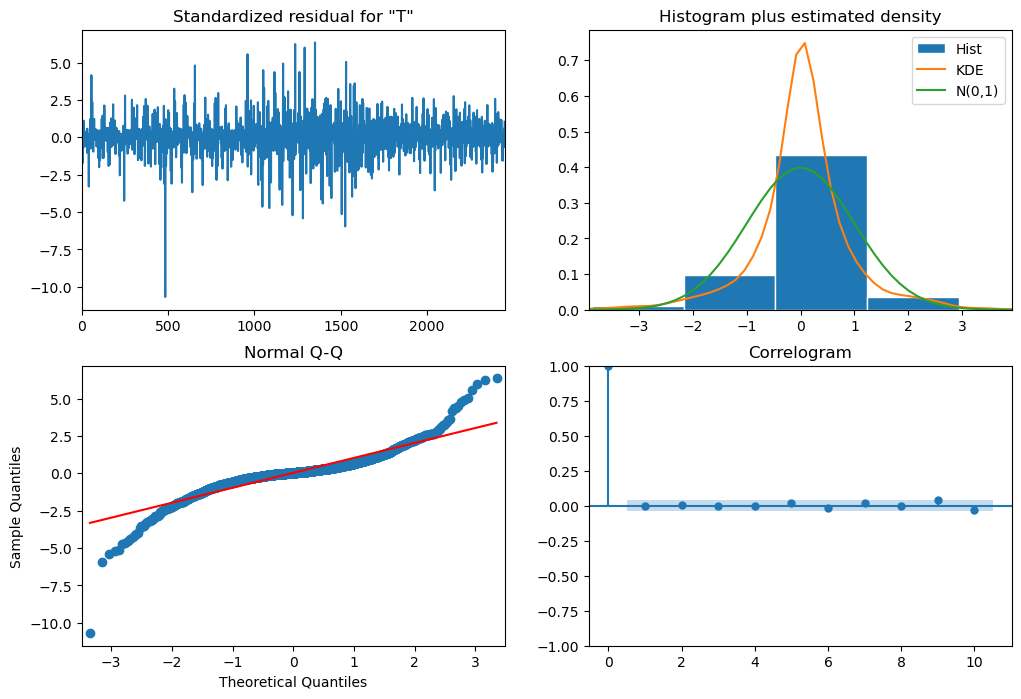

In [56]:
# ARIMA Residuals
arima_results.plot_diagnostics(figsize=(12, 8))
plt.show()


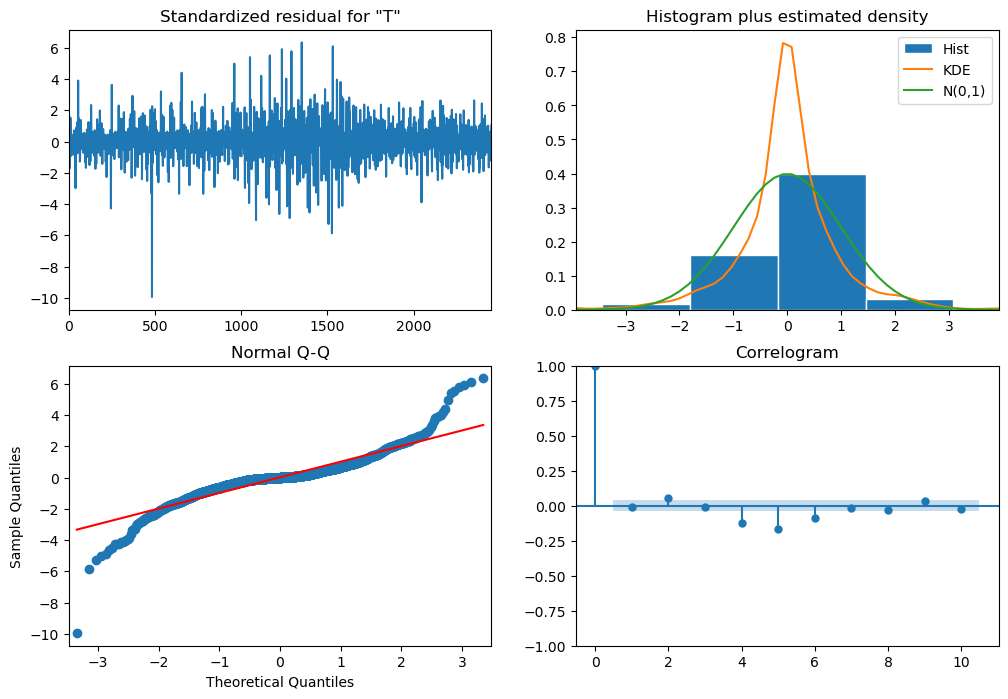

In [57]:
# SARIMA Residuals
sarima_results.plot_diagnostics(figsize=(12, 8))
plt.show()

The residuals for ARIMA model show significant spikes and are not consistently centered around zero, indicating that the ARIMA model struggles to capture some patterns in the data, while the residuals for SARIMA model are more consistent and centered around zero, suggesting that SARIMA captures the data's patterns better.

Additionally, in the SARIMA model, the histogram  aligns more closely with the normal distribution curve, showing that the residuals are closer to normality. Also, the correlogram shows that there is no predictable relationship between values at different lags, indicating randomness. This suggests that the model (SARIMA) successfully captures the seasonal patterns in the data compared to ARIMA.


In [58]:
# Plot Forecasts vs Actuals

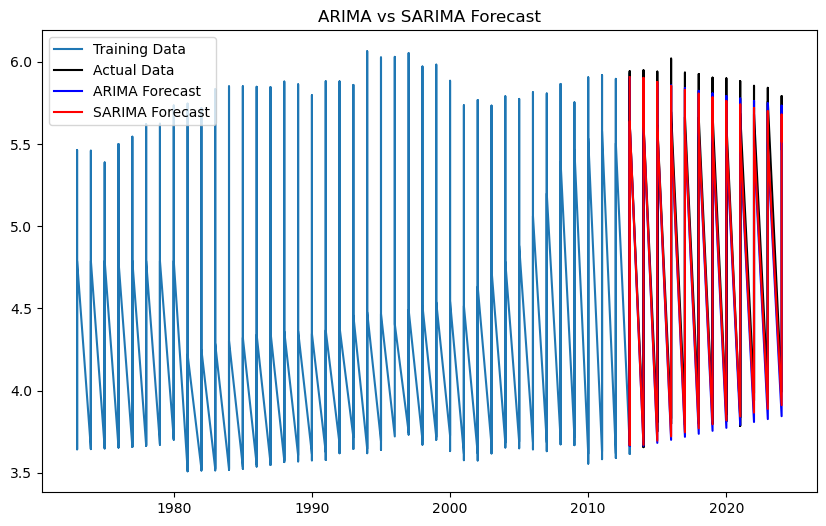

In [59]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Actual Data', color='black')
plt.plot(test.index, arima_forecast, label='ARIMA Forecast', color='blue')
plt.plot(test.index, sarima_forecast, label='SARIMA Forecast', color='red')
plt.legend()
plt.title('ARIMA vs SARIMA Forecast')
plt.show()

The plot indicates that the SARIMA forecast closely aligns with the actual data indicating better predictive accuracy.

We can use SARIMA model to predict the energy consumption in the next 10 years for example.

In [65]:
# forecast for the next five years
sarima_forecast_next10y = sarima_results.forecast(steps=120) # 120 corresponds to the number of months 
# print results
print(sarima_forecast_next10y)

2452    5.906731
2453    4.931789
2454    5.637192
2455    3.667593
2456    5.346220
          ...   
2567    5.858860
2568    4.942767
2569    5.613556
2570    3.717001
2571    5.360962
Name: predicted_mean, Length: 120, dtype: float64


In [66]:
# Create a future index for the next 120 months
future_months = pd.date_range(start=test.index[-1] + pd.DateOffset(months=1), periods=120, freq='M')


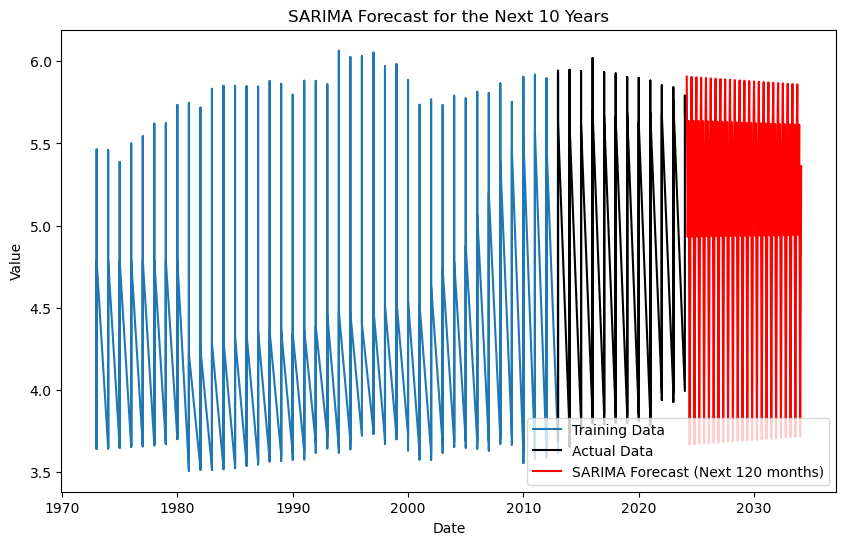

In [67]:
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Actual Data', color='black')

# Plot the SARIMA forecast for the next 10 years
plt.plot(future_months, sarima_forecast_next10y, label='SARIMA Forecast (Next 120 months)', color='red')

# Add labels and legend
plt.legend()
plt.title('SARIMA Forecast for the Next 10 Years')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()